# Project: Investigate A Dataset
## Movie Budgets

## Introduction

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines.
df = pd.read_csv('data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Data Cleaning

I noticed that there is at least one duplicate row (there are 10866 entries but only 10865 unique ids).

### Eliminate duplicates

In [9]:
# Get rid of any duplicate rows
df.drop_duplicates(inplace=True)

### Fix datatypes

The `release_date` column is an object, but it should be a datetime.

In [10]:
df.release_date.head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [11]:
# Convert to a datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Net Income

I intend to look at profitability, so I'm going to add a `net_income` column.

In [21]:
df['net_income'] = df['revenue_adj'].dropna() - df['budget_adj'].dropna()

In [23]:
df['net_income'].describe()

count    1.086500e+04
mean     3.381911e+07
std      1.252194e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.293091e+07
max      2.750137e+09
Name: net_income, dtype: float64

### Top-Level Genre

In [52]:
df.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [53]:
# TODO(norton): figure out how to deal with the pipe-delimited Genres column

## Exploratory Data Analysis



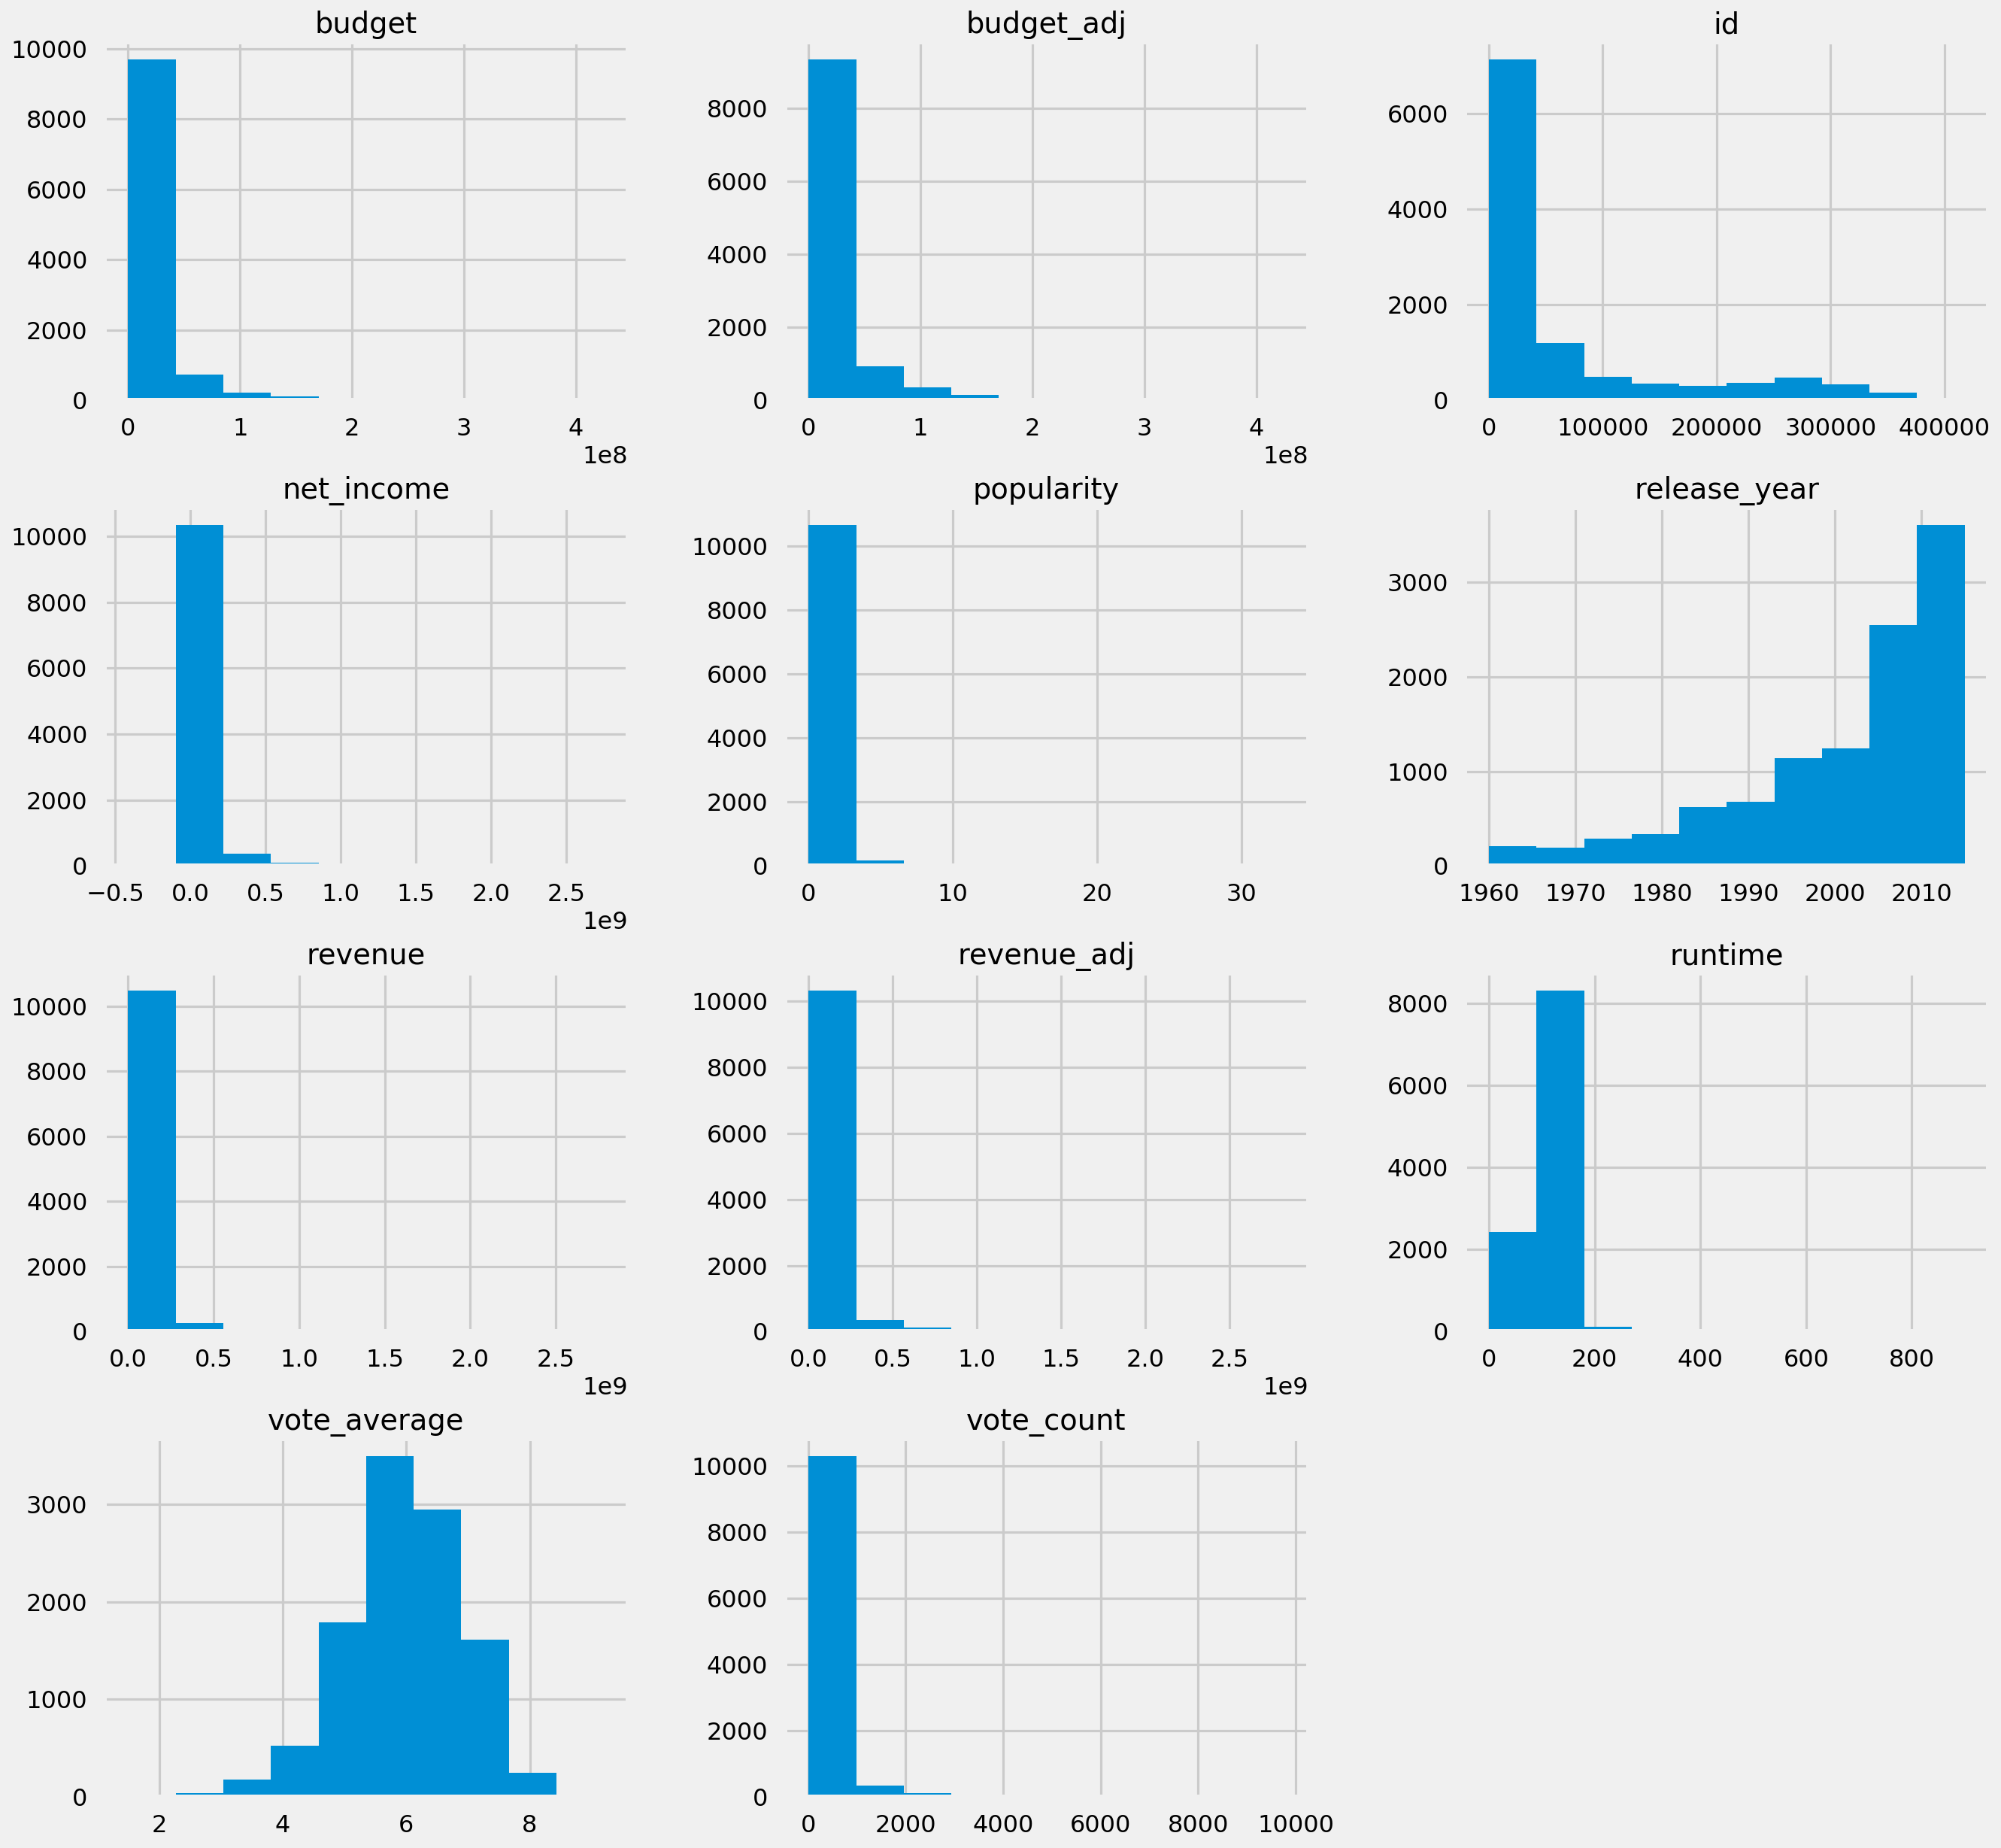

In [24]:
df.hist(figsize=(20,20))
plt.show()

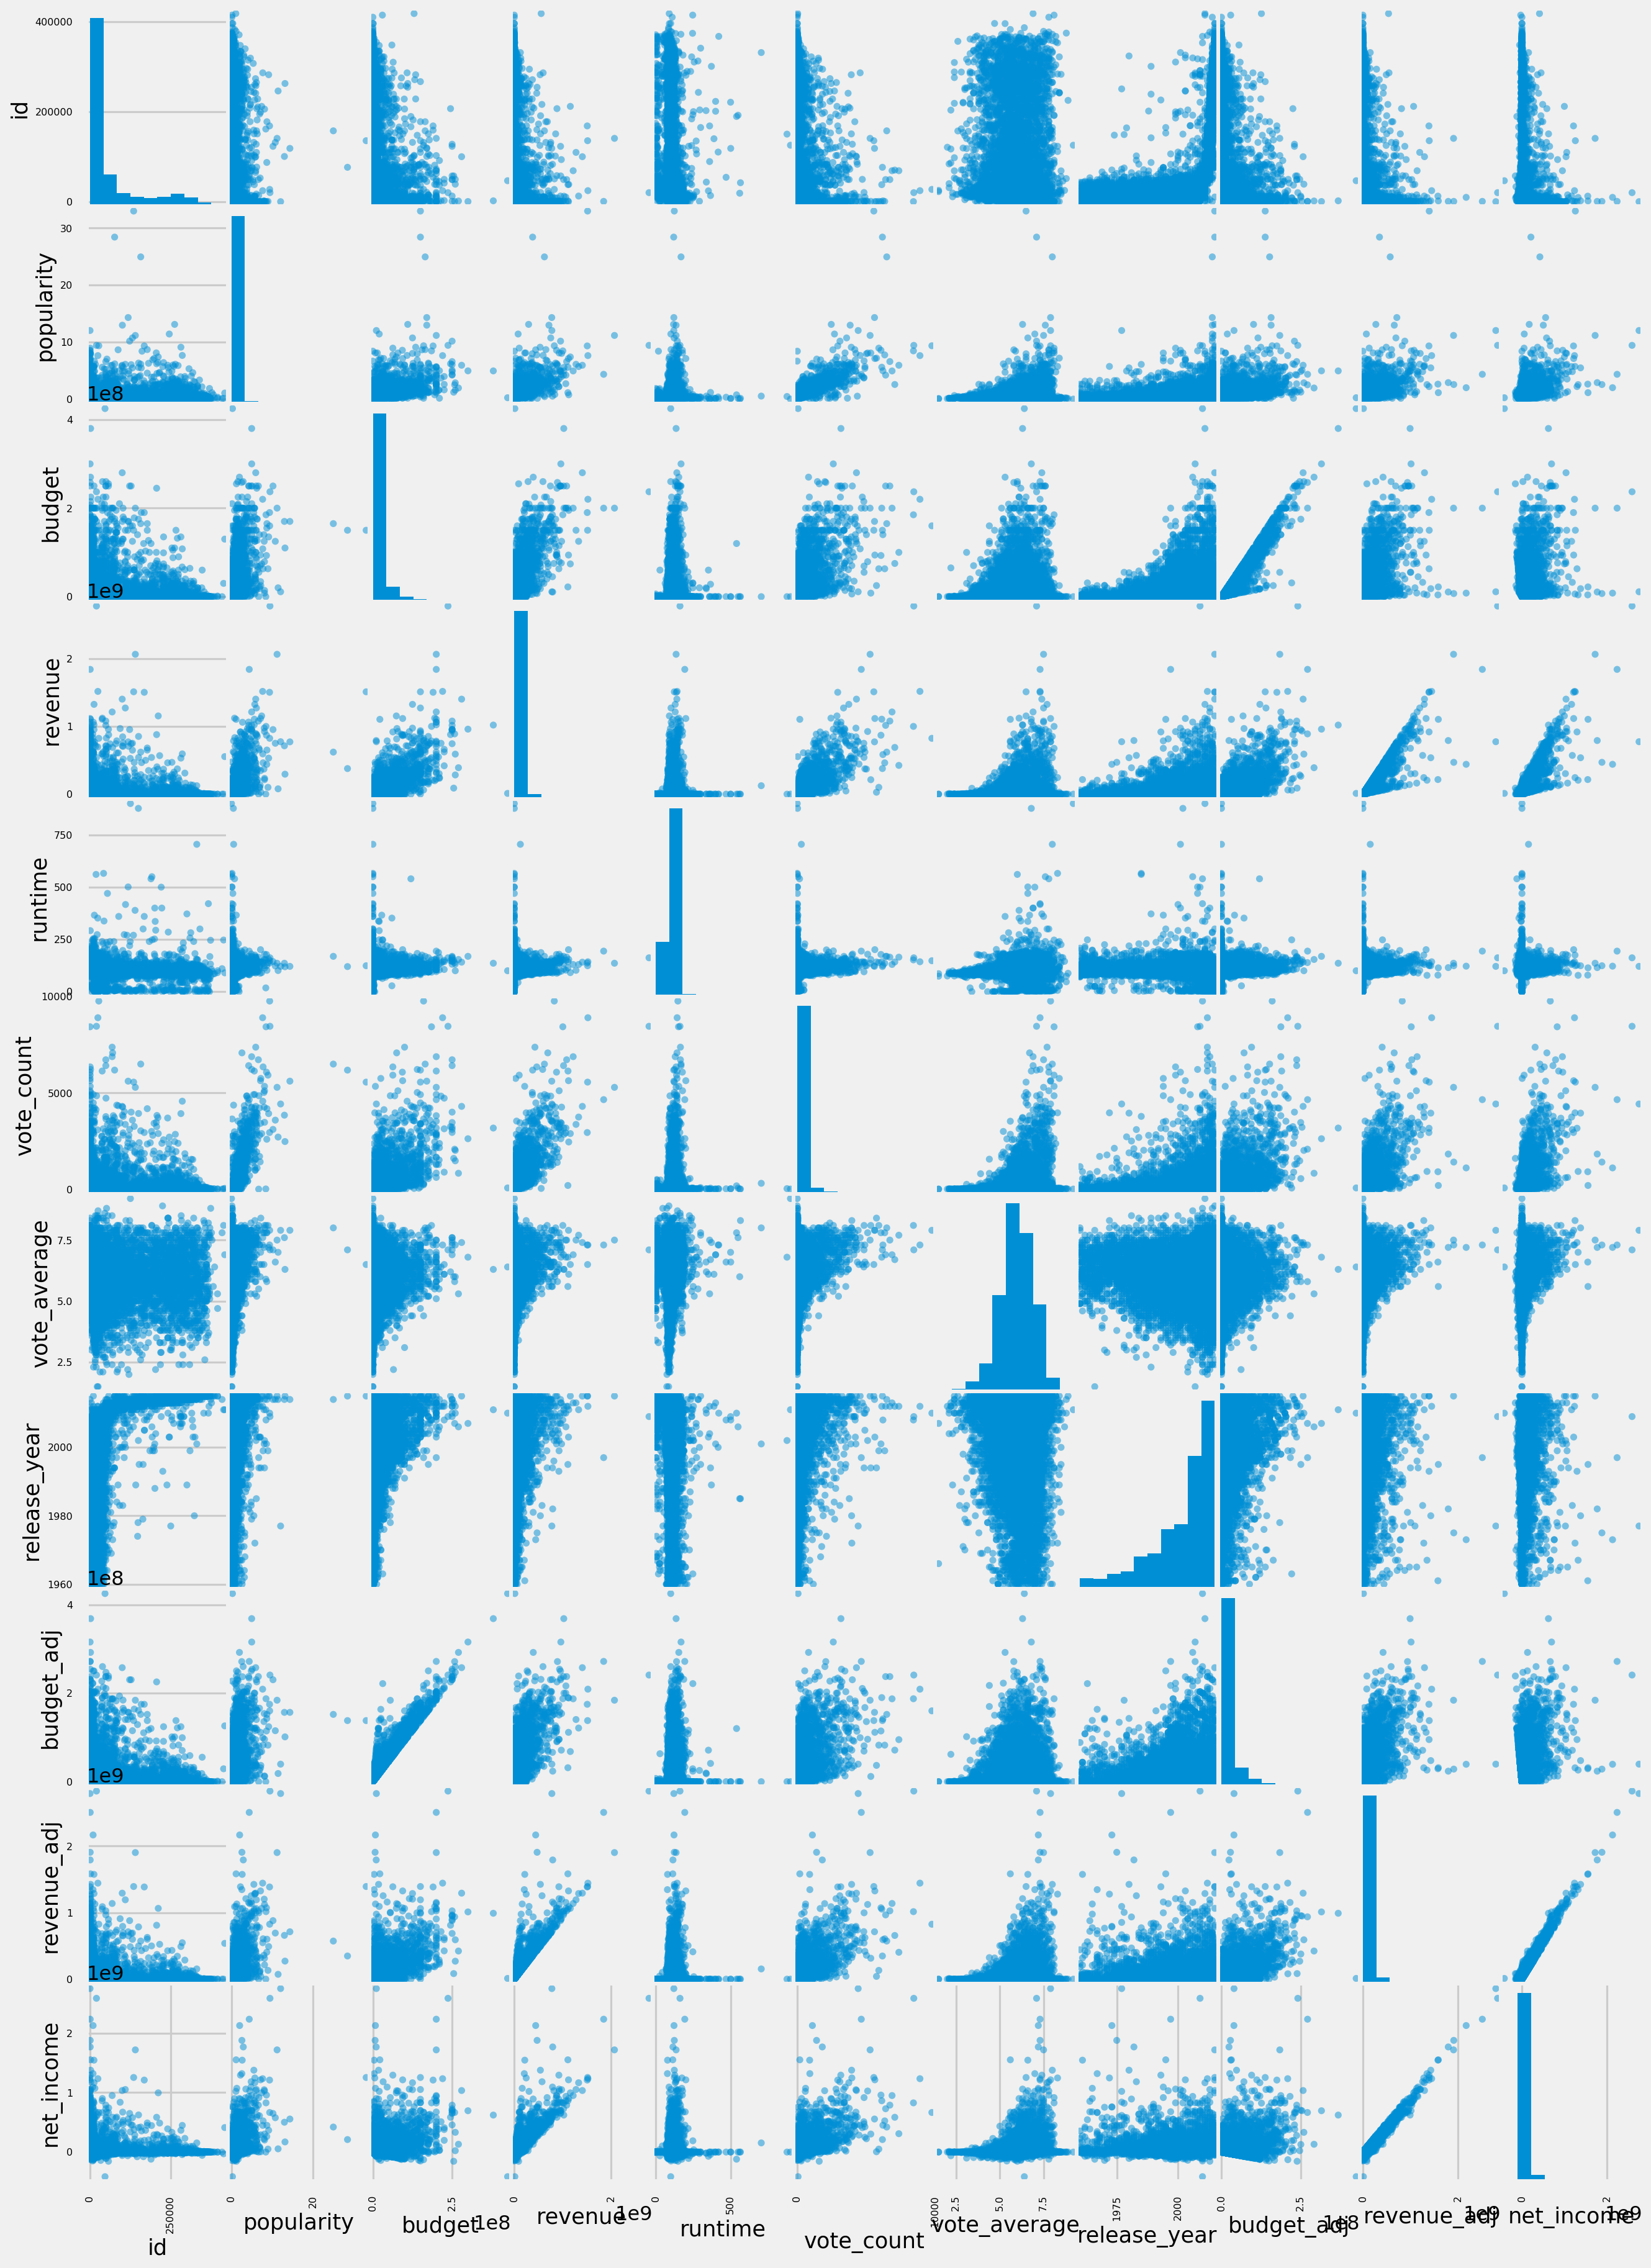

In [26]:
pd.plotting.scatter_matrix(df, figsize=(20, 30))
plt.show()

In [27]:
df['genres'].nunique()

2039

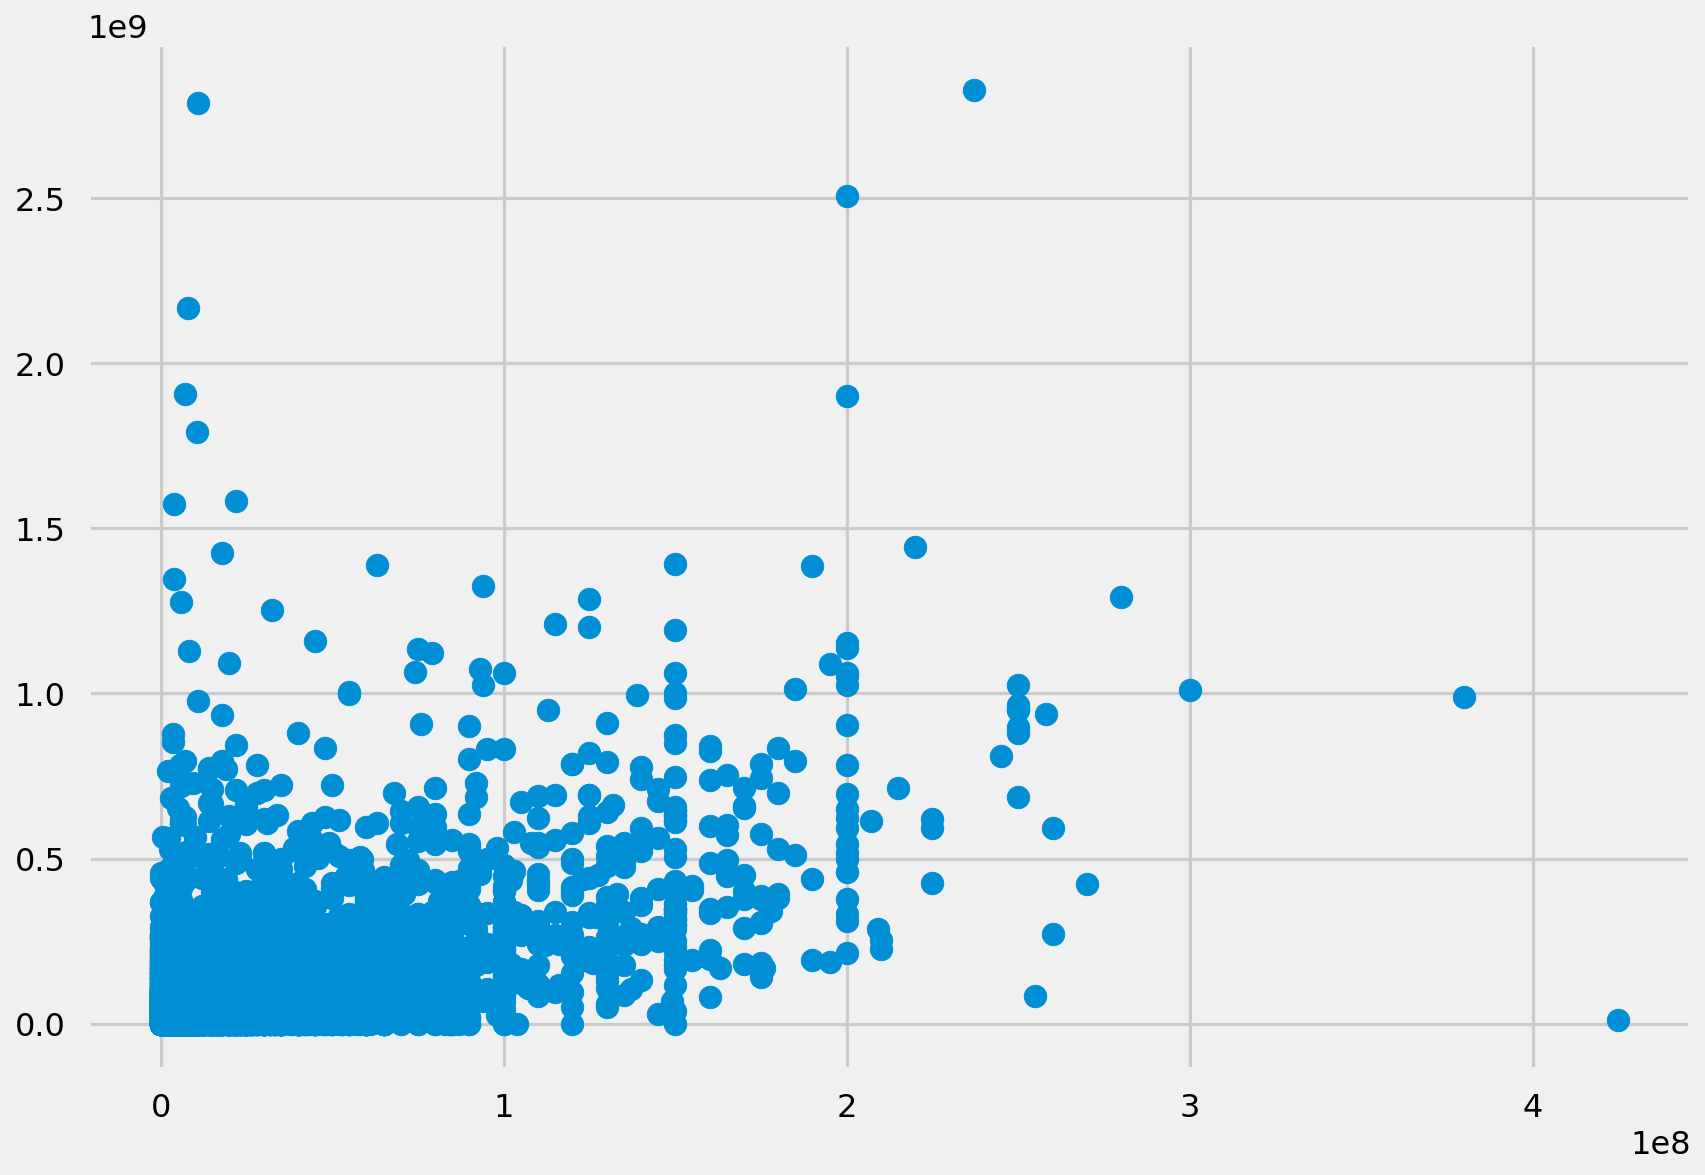

In [28]:
plt.scatter(df['budget'], df['revenue_adj'])
plt.show()

### Research Question 1: What is the most profitable genre?

In [69]:
scifi = df[df['genres'].str.contains('Science Fiction', na=False)]

In [77]:
scifi.sort_values(['net_income'], ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income,genre_primary
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09,Adventure
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09,Action
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09,1.767968e+09,Science Fiction
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Action
7309,1891,tt0080684,5.488441,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1980-01-01,3954,8.0,1980,4.762866e+07,1.424626e+09,1.376998e+09,Adventure


In [78]:
scifi.sort_values(['net_income'], ascending=True).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income,genre_primary
5265,10357,tt0120461,0.999866,90000000,0,Volcano,Tommy Lee Jones|Anne Heche|Gaby Hoffmann|Don C...,NaN,Mick Jackson,The coast is toast,...,Science Fiction|Action|Drama|Thriller,Twentieth Century Fox Film Corporation,1997-04-25,172,5.0,1997,1.222614e+08,0.000000e+00,-1.222614e+08,Science Fiction
4078,11692,tt0180052,0.912373,100000000,7103973,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,NaN,Ron Underwood,Action's future has arrived...,...,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,75,4.6,2002,1.212261e+08,8.611872e+06,-1.126143e+08,Action
1696,14164,tt1098327,0.322320,100000000,0,Dragonball Evolution,Justin Chatwin|Joon Park|Jamie Chung|Emmy Ross...,NaN,James Wong,The legend comes to life.,...,Action|Adventure|Fantasy|Science Fiction|Thriller,Ingenious Film Partners|Twentieth Century Fox ...,2009-04-01,261,3.1,2009,1.016400e+08,0.000000e+00,-1.016400e+08,Action
8765,10384,tt0134983,0.385350,90000000,14828081,Supernova,James Spader|Angela Bassett|Robert Forster|Lou...,NaN,Walter Hill|Jack Sholder,"In the farthest reaches of space, something ha...",...,Science Fiction,United Artists|Metro-Goldwyn-Mayer (MGM)|Hamme...,2000-01-14,42,4.7,2000,1.139663e+08,1.877668e+07,-9.518961e+07,Science Fiction
8999,10153,tt0120184,1.152417,75000000,13100000,Sphere,Dustin Hoffman|Sharon Stone|Samuel L. Jackson|...,http://www.warnerbros.com/movies/home-entertai...,Barry Levinson,"A thousand feet beneath the sea, the blackest ...",...,Science Fiction,Punch Productions|Warner Bros.|Baltimore Pictu...,1998-02-13,238,5.6,1998,1.003272e+08,1.752381e+07,-8.280335e+07,Science Fiction


### Research Question 2: Keanu Reeves

In [79]:
whoa = df[df['cast'].str.contains('Keanu Reeves', na=False)]

In [80]:
whoa.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income,genre_primary
79,263472,tt3605418,2.080935,2500000,5214043,Knock Knock,Keanu Reeves|Lorenza Izzo|Ana de Armas|Aaron B...,http://knockknockmovie.tumblr.com/,Eli Roth,One night can cost you everything.,...,Drama|Horror|Thriller,Universum Film (UFA)|Dragonfly Entertainment|B...,2015-06-26,473,4.8,2015,2.299999e+06,4.796917e+06,2.496918e+06,Drama
459,321769,tt3312868,0.207133,0,0,Deep Web,Gavin Andresen|Ross Ulbricht|Cody Wilson|Keanu...,http://www.deepwebthemovie.com,Alex Winter,The Crime Saga of the Digital Age,...,Documentary,Epix|Trouper Productions|BOND360,2015-03-15,47,6.9,2015,0.000000e+00,0.000000e+00,0.000000e+00,Documentary
632,245891,tt2911666,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,Don't set him off.,...,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07,5.410479e+07,Action
1684,4475,tt1134629,0.336426,0,0,The Private Lives of Pippa Lee,Robin Wright|Alan Arkin|Keanu Reeves|Julianne ...,NaN,Rebecca Miller,She lived many lives - except her own.,...,Comedy|Drama|Romance,Elevation Filmworks|Grand Army Entertainment,2009-07-07,31,6.1,2009,0.000000e+00,0.000000e+00,0.000000e+00,Comedy
2083,53172,tt1220888,0.602854,12000000,204940,Henry's Crime,Keanu Reeves|Vera Farmiga|James Caan|Judy Gree...,NaN,Malcolm Venville,The real crime is not committing to your dreams.,...,Action|Comedy|Thriller,Company Films|Moving Pictures Film and Television,2010-01-14,49,5.8,2010,1.200000e+07,2.049400e+05,-1.179506e+07,Action


In [82]:
whoa.sort_values(['net_income'], ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income,genre_primary
4954,604,tt0234215,4.029240,150000000,738599701,The Matrix Reloaded,Keanu Reeves|Carrie-Anne Moss|Laurence Fishbur...,NaN,Lilly Wachowski|Lana Wachowski,Free your mind.,...,Adventure|Action|Thriller|Science Fiction,Village Roadshow Pictures|NPV Entertainment|He...,2003-05-15,2376,6.6,2003,1.778029e+08,8.755011e+08,6.976982e+08,Adventure
2410,603,tt0133093,7.753899,63000000,463517383,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,http://www.warnerbros.com/matrix,Lilly Wachowski|Lana Wachowski,Welcome to the Real World.,...,Action|Science Fiction,Village Roadshow Pictures|Groucho II Film Part...,1999-03-30,6351,7.8,1999,8.247033e+07,6.067687e+08,5.242984e+08,Action
4181,1637,tt0111257,2.536898,30000000,350448145,Speed,Keanu Reeves|Sandra Bullock|Dennis Hopper|Jeff...,NaN,Jan de Bont,Get ready for rush hour,...,Action|Adventure|Crime|Thriller,Twentieth Century Fox Film Corporation,1994-06-09,1012,6.6,1994,4.413335e+07,5.155483e+08,4.714150e+08,Action
4953,605,tt0242653,4.212650,150000000,424988211,The Matrix Revolutions,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,NaN,Lilly Wachowski|Lana Wachowski,Everything that has a beginning has an end.,...,Adventure|Action|Thriller|Science Fiction,Village Roadshow Pictures|NPV Entertainment|Si...,2003-11-05,2138,6.4,2003,1.778029e+08,5.037609e+08,3.259580e+08,Adventure
8248,6114,tt0103874,1.432653,40000000,215862692,Dracula,Gary Oldman|Winona Ryder|Anthony Hopkins|Keanu...,NaN,Francis Ford Coppola,Love never dies.,...,Romance|Horror,American Zoetrope|Columbia Pictures Corporatio...,1992-11-13,545,6.8,1992,6.216097e+07,3.354559e+08,2.732949e+08,Romance


In [83]:
whoa.sort_values(['net_income'], ascending=True).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income,genre_primary
10335,1689,tt0107426,0.321865,35000000,4858139,Little Buddha,Keanu Reeves|Bridget Fonda|Chris Isaak|Ruochen...,NaN,Bernardo Bertolucci,A magical journey to a place where the past an...,...,Drama|History,Miramax Films,1993-12-01,33,5.8,1993,5.283145e+07,7.333215e+06,-4.549823e+07,Drama
8723,10685,tt0204626,0.650841,33000000,0,The Watcher,James Spader|Keanu Reeves|Marisa Tomei|Ernie H...,NaN,Joe Charbanic,Don't go home alone.,...,Mystery|Thriller,Universal Pictures,2000-09-08,54,4.7,2000,4.178764e+07,0.000000e+00,-4.178764e+07,Mystery
9691,21309,tt0091860,0.188258,19000000,0,River's Edge,Crispin Glover|Keanu Reeves|Ione Skye|Daniel R...,NaN,Tim Hunter,The most controversial film you will see this ...,...,Crime|Drama,Hemdale Film|Island,1987-04-23,16,5.7,1987,3.646253e+07,0.000000e+00,-3.646253e+07,Crime
5462,64686,tt1335975,1.917450,175000000,150962475,47 Ronin,Keanu Reeves|Hiroyuki Sanada|Kou Shibasaki|Tad...,NaN,Carl Rinsch,For courage. For loyalty. For honour.,...,Action|Adventure|Fantasy,Mid Atlantic Films|Stuber Productions|Universa...,2013-12-06,940,5.8,2013,1.638058e+08,1.413059e+08,-2.249993e+07,Action
5598,76544,tt2016940,0.707968,25000000,2054941,Man of Tai Chi,Keanu Reeves|Tiger Hu Chen|Jeremy Marinas|Stev...,NaN,Keanu Reeves,No Rules. No Mercy. Pure Fighting.,...,Action|Drama,Universal Pictures|Village Roadshow Pictures|C...,2013-07-04,193,5.6,2013,2.340083e+07,1.923493e+06,-2.147734e+07,Action


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!